Name- AVINASH KUMAR

EnrollmentNo- E18CSE031

**Placement prediction for vocational training (short term training)**

Problem statement:
In this hackthon we will solve the placement prediction problem. Placement prediction has been done in two stage, first at the time of admission, second when training completed and result is availble.

**Prediction at admission time:** In probem 1. column 17(Result) and 18(certificate) will not used as input feature.  

**Prediction with result:** In probem 2. both Result and certificate will be included during prediction. 

**About Data**

 The feature of the data set are as follows:
1. Gender
2. agegroup	
3. EducationLevel	
4. TypeofDisability	
5. castecategory	
6. Religion	
7. Candidate State	
8. Candidate District	
9. PartnerName	
10. TC State	
11. TC District	
12. TC Constituency	
13. TC Name	
14. SectorName	
15. JobRole	
16. TotalCandidatesinBatch	
17. Result	
18. Certified	
	
Target column **placed**

"placed": {"Yes": 1, "No": 2}

All the columns in dataset converted into numbers with label encoding. 

You will get four csv file named as 
For probelm 1

1. trainadmission.csv
2. testadmission.csv

For problem2

3. trainresult.csv
4. testresult.csv

Submission or result and code:

you are suppose to submit two csv file:

1. "enrollmentno"_testadmission.csv
2. "enrollmentno"_testresult.csv

3. "enrollmentno"_hack1.ipynb  (python Notebook/ python file)

both the submission includes placed column in test file at the end. 

Best wishes

In [59]:
#Start your code!!
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE

In [60]:
data=pd.read_csv("data/trainadmission.csv")
data.head(10)

,Unnamed: 0,Gender,TypeofDisability,castecategory,Religion,Candidate State,Candidate District,PartnerName,TC State,TC District,TC Constituency,TC Name,SectorName,JobRole,TotalCandidatesinBatch,agegroup,EducationLevel,placed
0,124392,1,1,3,5,11,448,54,11,442,405,2752,4,4,1,2,2,2
1,99020,1,1,3,3,13,189,59,13,187,82,365,9,35,1,4,3,1
2,1109,2,1,3,3,11,108,59,11,105,102,925,9,35,1,3,3,1
3,131599,2,1,1,3,6,83,654,6,81,192,2342,22,57,1,2,4,1
4,113142,1,1,3,5,20,376,66,20,372,528,580,5,5,1,3,3,1
5,147899,2,1,3,1,8,300,11,8,301,89,483,3,3,1,4,6,1
6,117613,1,1,3,3,5,365,11,5,364,346,718,11,30,1,4,5,2
7,121004,2,1,3,1,9,86,61,9,84,117,166,3,3,1,4,3,2
8,30903,2,1,1,1,8,91,65,8,89,88,241,9,21,1,3,3,2
9,44299,2,1,1,3,18,251,123,18,253,242,801,12,17,1,4,2,2


In [61]:
data.shape

(127500, 18)

In [62]:
LABELS= ['placed','Not placed']

Text(0,0.5,'Numbers')

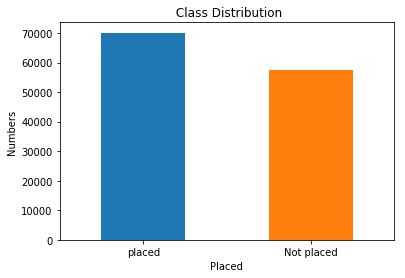

In [63]:
count_classes = pd.value_counts(data['placed'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title(" Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Placed")

plt.ylabel("Numbers")

In [69]:
scaler = MinMaxScaler()
data1 = scaler.fit_transform(data)

data=data1
data

array([[0.82928553, 0.        , 0.        , ..., 0.16666667, 0.2       ,
        1.        ],
       [0.66013773, 0.        , 0.        , ..., 0.5       , 0.4       ,
        0.        ],
       [0.00739338, 1.        , 0.        , ..., 0.33333333, 0.4       ,
        0.        ],
       ...,
       [0.95655971, 0.        , 0.        , ..., 0.83333333, 0.2       ,
        1.        ],
       [0.04333362, 1.        , 0.        , ..., 0.5       , 0.4       ,
        1.        ],
       [0.00599337, 1.        , 0.        , ..., 0.5       , 0.2       ,
        1.        ]])

In [66]:
X = data.drop('placed',1)
y = data['placed']

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [38]:
explained_variance = pca.explained_variance_ratio_

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[  631 10623]
 [  483 13763]]
0.5644705882352942


Text(0,0.5,'Second PCA')

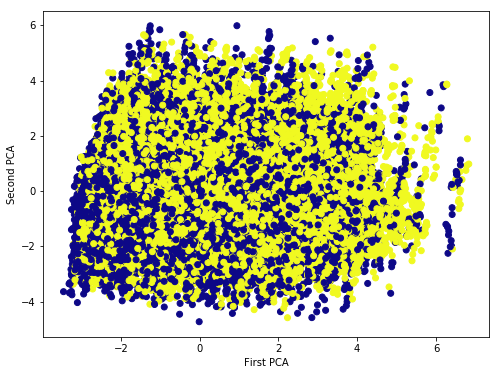

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['placed'],cmap= 'plasma')
plt.xlabel("First PCA")
plt.ylabel("Second PCA")

# Adaboost

In [50]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [51]:
predictions = classifier.predict(X_test)

In [52]:
confusion_matrix(y_test, predictions)

array([[  615, 10639],
       [  463, 13783]], dtype=int64)

In [53]:
print(accuracy_score(y_test, y_pred))

0.5644705882352942
